<a href="https://colab.research.google.com/github/KuganParthiban/portfolio_projects/blob/main/Predict_House_Price(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [5]:
df_train.shape

(2016, 8)

In [6]:
df_test.shape 

(505, 8)

In [7]:
df_train.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

In [8]:
df_train.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [9]:
(df_train.isnull().sum()/len(df_train))

beds              0.000000
baths             0.000000
size              0.000000
size_units        0.000000
lot_size          0.172123
lot_size_units    0.172123
zip_code          0.000000
price             0.000000
dtype: float64

In [10]:
(df_test.isnull().sum()/len(df_test))

beds              0.000000
baths             0.000000
size              0.000000
size_units        0.000000
lot_size          0.152475
lot_size_units    0.152475
zip_code          0.000000
price             0.000000
dtype: float64

In [11]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [12]:
df_train.describe()

,beds,baths,size,lot_size,zip_code,price
count,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1.669000e+03
mean,3.122229,2.294488,1893.097663,3871.059694,98124.519473,1.038475e+06
std,1.186723,1.008658,916.952780,2719.402066,23.159993,1.007944e+06
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1260.000000,1252.000000,98108.000000,6.800000e+05
50%,3.000000,2.000000,1719.000000,4000.000000,98117.000000,8.650000e+05
75%,4.000000,3.000000,2360.000000,6000.000000,98126.000000,1.175000e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [13]:
df_test.describe()

,beds,baths,size,lot_size,zip_code,price
count,428.000000,428.000000,428.000000,428.000000,428.000000,4.280000e+02
mean,3.196262,2.348131,2008.873832,3994.459813,98126.892523,1.045011e+06
std,1.132358,1.019285,902.873079,2696.962024,26.251399,6.189425e+05
min,1.000000,1.000000,376.000000,0.230000,98102.000000,1.700000e+05
25%,2.000000,2.000000,1338.250000,1326.500000,98108.000000,6.943750e+05
50%,3.000000,2.000000,1840.000000,4190.000000,98118.000000,8.800000e+05
75%,4.000000,3.000000,2521.750000,6000.000000,98133.750000,1.200000e+06
max,9.000000,7.000000,6139.000000,9974.000000,98199.000000,6.250000e+06


In [14]:
df_train['lot_size_units'].unique()

array(['sqft', 'acre'], dtype=object)

In [15]:
df_train['zip_code'] = df_train['zip_code'].astype(str)

<ipython-input-15-31924007cd1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['zip_code'] = df_train['zip_code'].astype(str)


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            1669 non-null   int64  
 1   baths           1669 non-null   float64
 2   size            1669 non-null   float64
 3   size_units      1669 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        1669 non-null   object 
 7   price           1669 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 117.4+ KB


In [17]:
df_train.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

In [18]:
df_acre = df_train.loc[df_train['lot_size_units']=='acre']
df_acre

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
5,2,2.0,1190.0,sqft,1.00,acre,98107,740000.0
25,2,1.5,889.0,sqft,0.23,acre,98103,680000.0
33,2,2.0,871.0,sqft,0.29,acre,98119,430000.0
37,5,5.0,2510.0,sqft,0.27,acre,98133,1000000.0
...,...,...,...,...,...,...,...,...
1980,1,1.0,865.0,sqft,1.26,acre,98112,712500.0
1998,4,3.5,4990.0,sqft,0.25,acre,98112,4815000.0
2006,2,2.0,839.0,sqft,0.53,acre,98125,385000.0
2010,2,2.0,1400.0,sqft,0.34,acre,98199,699950.0


In [19]:
df_acre['lot_size']=df_acre['lot_size']*43560
df_acre.head()

<ipython-input-19-111f8a246d8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acre['lot_size']=df_acre['lot_size']*43560


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
1,4,2.0,2240.0,sqft,13503.6,acre,98106,915000.0
5,2,2.0,1190.0,sqft,43560.0,acre,98107,740000.0
25,2,1.5,889.0,sqft,10018.8,acre,98103,680000.0
33,2,2.0,871.0,sqft,12632.4,acre,98119,430000.0
37,5,5.0,2510.0,sqft,11761.2,acre,98133,1000000.0


In [20]:
df_sqft = df_train.loc[df_train['lot_size_units']=='sqft']
df_sqft

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
6,1,1.0,670.0,sqft,6000.0,sqft,98133,460000.0
7,5,3.5,4510.0,sqft,6000.0,sqft,98105,3150000.0
...,...,...,...,...,...,...,...,...
2007,3,1.0,1120.0,sqft,7407.0,sqft,98178,708000.0
2008,3,2.0,1482.0,sqft,1085.0,sqft,98117,919000.0
2009,3,3.5,1680.0,sqft,1486.0,sqft,98126,675000.0
2013,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0


In [21]:
concat = [df_acre,df_sqft]

df_train = pd.concat(concat)

In [22]:
df_train

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
1,4,2.0,2240.0,sqft,13503.6,acre,98106,915000.0
5,2,2.0,1190.0,sqft,43560.0,acre,98107,740000.0
25,2,1.5,889.0,sqft,10018.8,acre,98103,680000.0
33,2,2.0,871.0,sqft,12632.4,acre,98119,430000.0
37,5,5.0,2510.0,sqft,11761.2,acre,98133,1000000.0
...,...,...,...,...,...,...,...,...
2007,3,1.0,1120.0,sqft,7407.0,sqft,98178,708000.0
2008,3,2.0,1482.0,sqft,1085.0,sqft,98117,919000.0
2009,3,3.5,1680.0,sqft,1486.0,sqft,98126,675000.0
2013,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0


In [23]:
df_train.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

In [24]:
df_train['size_units'].unique()

array(['sqft'], dtype=object)

In [25]:
df_train = df_train[['beds', 'baths', 'size', 'lot_size','zip_code', 'price']]

In [26]:
df_train.columns

Index(['beds', 'baths', 'size', 'lot_size', 'zip_code', 'price'], dtype='object')

In [27]:
df_train.dtypes

beds          int64
baths       float64
size        float64
lot_size    float64
zip_code     object
price       float64
dtype: object

In [28]:
df_acre2 = df_test.loc[df_test['lot_size_units']=='acre']
df_acre2['lot_size']=df_acre2['lot_size']*43560
df_acre2.head()

<ipython-input-28-0b9b85802276>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acre2['lot_size']=df_acre2['lot_size']*43560


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
3,3,2.0,2360.0,sqft,12196.8,acre,98188,565000.0
13,2,2.0,1800.0,sqft,31363.2,acre,98199,699950.0
15,2,2.0,2241.0,sqft,47480.4,acre,98112,2450000.0
20,4,2.0,1690.0,sqft,13939.2,acre,98168,550000.0
30,2,2.0,964.0,sqft,172933.2,acre,98126,512500.0


In [29]:
df_sqft2 = df_test.loc[df_test['lot_size_units']=='sqft']
df_sqft2

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.0,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.0,sqft,98125,799000.0
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0
5,2,2.0,963.0,sqft,4753.0,sqft,98122,701000.0
...,...,...,...,...,...,...,...,...
497,2,2.5,1250.0,sqft,1000.0,sqft,98107,770000.0
499,2,1.5,1088.0,sqft,1807.0,sqft,98117,628000.0
501,3,2.5,1390.0,sqft,1570.0,sqft,98126,575000.0
503,5,5.0,3010.0,sqft,4887.0,sqft,98115,1807000.0


In [30]:
concat2 = [df_acre2,df_sqft2]

df_test = pd.concat(concat2)

In [31]:
df_test.head(10)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
3,3,2.0,2360.0,sqft,12196.8,acre,98188,565000.0
13,2,2.0,1800.0,sqft,31363.2,acre,98199,699950.0
15,2,2.0,2241.0,sqft,47480.4,acre,98112,2450000.0
20,4,2.0,1690.0,sqft,13939.2,acre,98168,550000.0
30,2,2.0,964.0,sqft,172933.2,acre,98126,512500.0
40,2,2.5,2760.0,sqft,133293.6,acre,98105,1440000.0
44,4,3.5,4027.0,sqft,13068.0,acre,98199,2170000.0
52,1,1.0,718.0,sqft,28314.0,acre,98115,525000.0
61,3,1.5,1460.0,sqft,10890.0,acre,98168,410000.0
64,4,2.5,3200.0,sqft,12196.8,acre,98118,1100000.0


In [32]:
df_test = df_test[['beds', 'baths', 'size', 'lot_size','zip_code', 'price']]

In [33]:
df_test.head(10)

,beds,baths,size,lot_size,zip_code,price
3,3,2.0,2360.0,12196.8,98188,565000.0
13,2,2.0,1800.0,31363.2,98199,699950.0
15,2,2.0,2241.0,47480.4,98112,2450000.0
20,4,2.0,1690.0,13939.2,98168,550000.0
30,2,2.0,964.0,172933.2,98126,512500.0
40,2,2.5,2760.0,133293.6,98105,1440000.0
44,4,3.5,4027.0,13068.0,98199,2170000.0
52,1,1.0,718.0,28314.0,98115,525000.0
61,3,1.5,1460.0,10890.0,98168,410000.0
64,4,2.5,3200.0,12196.8,98118,1100000.0


In [34]:
df_test.dtypes

beds          int64
baths       float64
size        float64
lot_size    float64
zip_code      int64
price       float64
dtype: object

In [35]:
df_test['zip_code'] = df_test['zip_code'].astype(str)

In [36]:
df_test.dtypes

beds          int64
baths       float64
size        float64
lot_size    float64
zip_code     object
price       float64
dtype: object

In [37]:
concat3 = [df_train, df_test]

df = pd.concat(concat3)

In [38]:
df.head(10)

,beds,baths,size,lot_size,zip_code,price
1,4,2.0,2240.0,13503.6,98106,915000.0
5,2,2.0,1190.0,43560.0,98107,740000.0
25,2,1.5,889.0,10018.8,98103,680000.0
33,2,2.0,871.0,12632.4,98119,430000.0
37,5,5.0,2510.0,11761.2,98133,1000000.0
43,1,1.0,617.0,21344.4,98109,480000.0
48,5,3.5,3590.0,15681.6,98136,2350000.0
62,5,3.0,2320.0,11761.2,98168,560000.0
70,4,3.5,2031.0,43560.0,98117,1480000.0
74,6,3.5,8660.0,12196.8,98102,4100000.0


In [39]:
import seaborn as sns

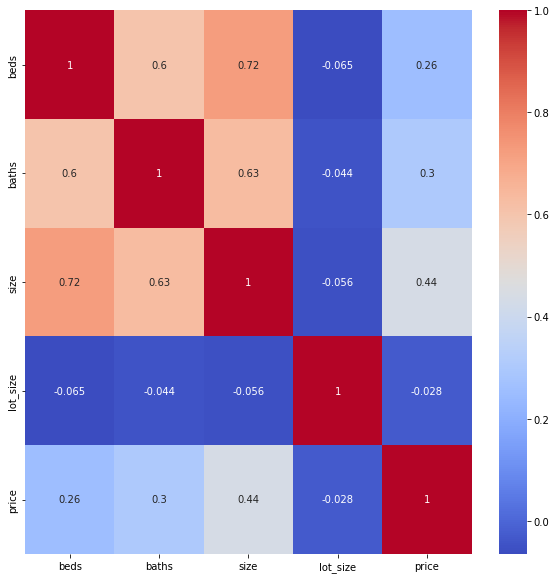

In [40]:
df_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.show()

In [41]:
df.columns

Index(['beds', 'baths', 'size', 'lot_size', 'zip_code', 'price'], dtype='object')

In [42]:
df['price'].describe()

count    2.097000e+03
mean     1.039809e+06
std      9.415656e+05
min      1.590000e+05
25%      6.850000e+05
50%      8.700000e+05
75%      1.180000e+06
max      2.500000e+07
Name: price, dtype: float64

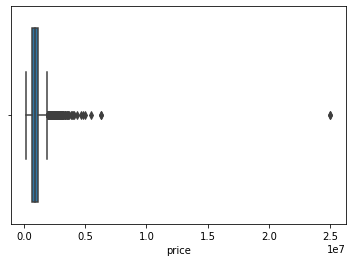

In [43]:
sns.boxplot(x='price',data=df)
plt.show()

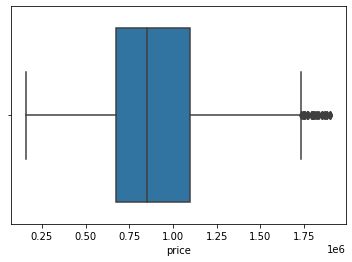

In [44]:
#remove outliers

df = df[df['price']<1922500]

#Box Plot
sns.boxplot(x='price',data=df)
plt.show()

In [45]:
df.shape

(1962, 6)

In [46]:
df.columns

Index(['beds', 'baths', 'size', 'lot_size', 'zip_code', 'price'], dtype='object')

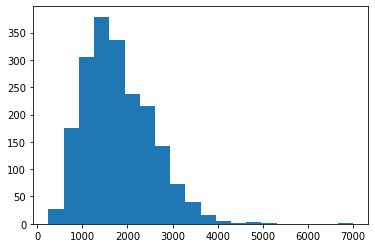

In [47]:
plt.hist(x=df['size'],bins=20)
plt.show()

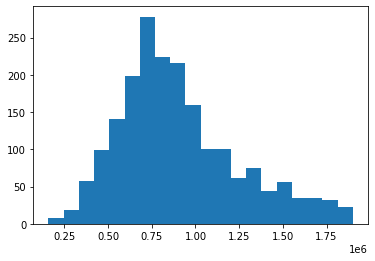

In [48]:
plt.hist(x=df['price'],bins=20)
plt.show()

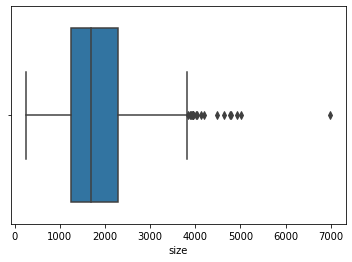

In [49]:
#Box Plot
sns.boxplot(x='size',data=df)
plt.show()

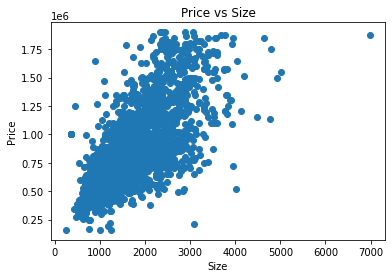

In [50]:
plt.scatter(df['size'],df['price'])
plt.title('Price vs Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [51]:
meanprice_bath = df.groupby('price',as_index = False)['baths'].mean()
meanprice_bath = meanprice_bath.round(2)
meanprice_bath

,price,baths
0,159000.0,1.00
1,159488.0,1.00
2,160000.0,2.00
3,170000.0,2.00
4,197009.0,1.50
...,...,...
686,1868000.0,7.00
687,1870000.0,2.50
688,1875000.0,3.50
689,1880000.0,4.25


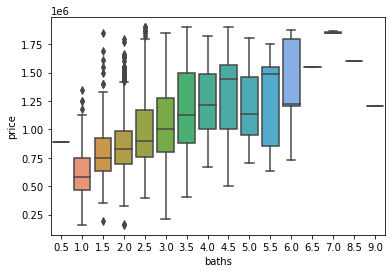

In [52]:
sns.boxplot(x='baths',
            y='price',
           data=df)
plt.show()

In [53]:
df = df[['beds', 'baths', 'size', 'lot_size','zip_code','price']]

In [54]:
df.dtypes

beds          int64
baths       float64
size        float64
lot_size    float64
zip_code     object
price       float64
dtype: object

In [55]:
#General Slicing & Accessing Variable
#x = df.iloc[:,:-1]
#y = df.iloc[:,-1]

In [56]:
#Transform Categorical Features to Encoded Dummy Numeric Variable
#x = pd.get_dummies(x,drop_first=True)
#x.head(6)

In [57]:
#from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler = scaler.fit(x_train)
#x_train = scaler.transform(x_train)

In [59]:
#Train the Ordinary Least Squared (OLS) algorithm
#import statsmodels.api as sm
#x_train = sm.add_constant(x_train)
#reg_model = sm.OLS(y_train,x_train).fit()

In [60]:
#reg_model.summary()

In [61]:

#Feature Scaling the Test Set
#from sklearn.preprocessing import StandardScaler
#x_test =  scaler.transform(x_test)

In [62]:
#Apply the Model using Test set
#x_test = sm.add_constant(x_test)
#y_pred = reg_model.predict(x_test) #Predict the output

In [63]:
#Dataframe of Predicted Output and Actual Output for Test set
#df_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) #Create Data Frame
#df_validate['Predicted']=df_validate['Predicted'].round(2)
#df_validate.head(10)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

In [65]:
#General Slicing & Accessing Variable
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [66]:
#from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [67]:
# Decision Tree Regressor

tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(x_train,y_train)
tr_regressor.score(x_test,y_test)
pred_tr = tr_regressor.predict(x_test)
decision_score=tr_regressor.score(x_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [73]:
# Random Forest Regressor

rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(x_train,y_train)
rf_regressor.score(x_test,y_test)
rf_pred =rf_regressor.predict(x_test)
rf_score=rf_regressor.score(x_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [74]:
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(x_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(x_test,y_test)*100))

Decision tree  Regression Model Score is  22
Random Forest Regression Model Score is  58


In [75]:
models_score =pd.DataFrame({'Model':['Decision Tree','Random forest Regression'],
                            'Score':[decision_score,rf_score],
                            'Explained Variance Score':[expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

,Model,Score,Explained Variance Score
1,Random forest Regression,0.580636,0.289930
0,Decision Tree,0.223896,0.195356
